Github_link = https://github.com/Begge10850/twitter_review_analysis

In [26]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from textblob import TextBlob

In [24]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/Projects/twitter_review_analysis/Twitter_Reviews.csv")

print("Data loaded") 

Data loaded


In [3]:
df.head()

,Review_Id,User_Name,User_Image,Comment,Thumbs_Up_Count,Version,Review_Created_At,Sort_Order
0,d80a474e-421c-408e-aa49-b06185a3830a,Sean Rollins,https://play-lh.googleusercontent.com/a-/ACNPE...,Twitter's obsession with turning itself into t...,7121,9.65.0-release.0,28-10-2022 01:48,most_relevant
1,adce2dfc-11d4-43e0-b4b3-891d942a3457,Andrew Pike,https://play-lh.googleusercontent.com/a-/ACNPE...,Absolute rubbish. It still keeps refreshing af...,4833,9.56.2-release.0,26-08-2022 08:26,most_relevant
2,205b4fe2-50f6-4cbd-b63a-d6a3722dfa24,Dean Hampton,https://play-lh.googleusercontent.com/a/ALm5wu...,The most recent update has ruined this app. Th...,2409,9.56.2-release.0,26-08-2022 18:31,most_relevant
3,2b18dec4-3094-4539-8f6e-dc51fe62fb21,Dave,https://play-lh.googleusercontent.com/a/ALm5wu...,No closed caption (cc) button is present to di...,4033,9.56.2-release.0,26-08-2022 16:05,most_relevant
4,426d8c6f-df41-459d-936c-eea1154af0b8,Royce Miller,https://play-lh.googleusercontent.com/a-/ACNPE...,This app is frustrating as heck. When you're s...,1671,9.57.0-release.1,02-09-2022 07:37,most_relevant


In [4]:
G = nx.DiGraph()

users = df["User_Name"].unique()
G.add_nodes_from(users)

for _, row in df.iterrows():
    user = row["User_Name"]
    comment = row["Comment"]
    mentioned_users = [u for u in users if u != user and u in comment]
    for mentioned_user in mentioned_users:
        G.add_edge(user, mentioned_user)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 1140
Number of edges: 977


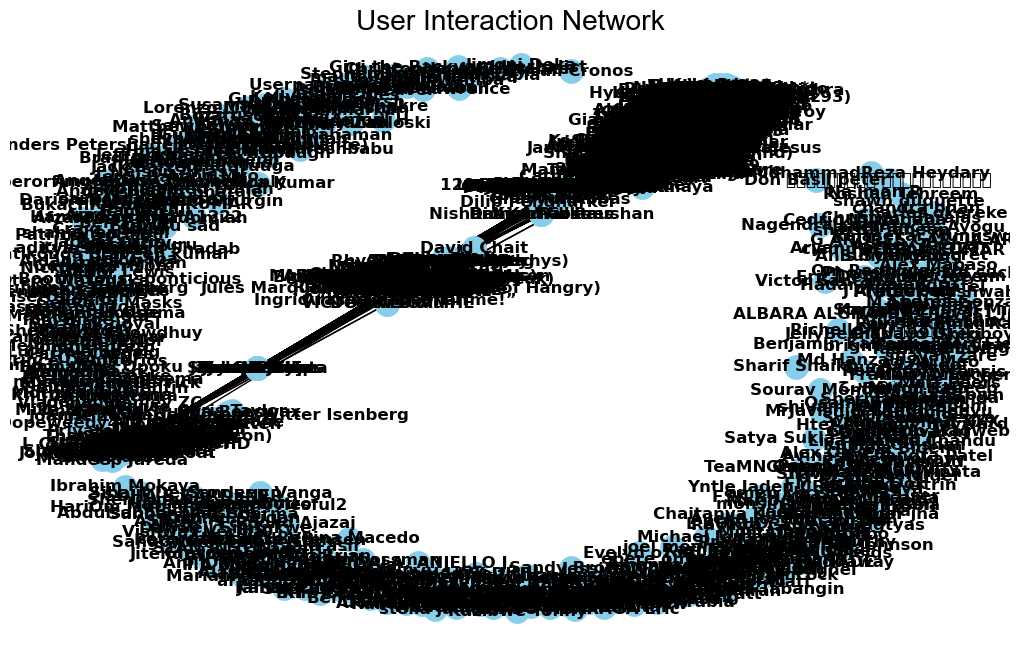

In [27]:
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("User Interaction Network")
plt.show()

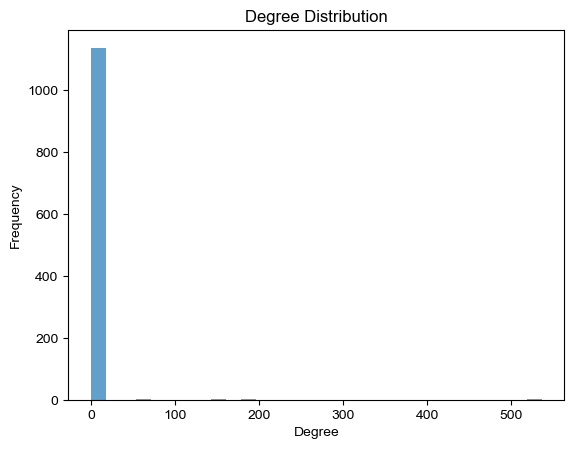

In [6]:
degrees = [val for (node, val) in G.degree()]
plt.hist(degrees, bins=30, alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [7]:
num_weakly_connected_components = sum(1 for cc in nx.weakly_connected_components(G))
print("Number of weakly connected components:", num_weakly_connected_components)

Number of weakly connected components: 450


In [8]:
weakly_connected_components_sizes = [len(comp) for comp in nx.weakly_connected_components(G)]
print("Sizes of weakly connected components:", weakly_connected_components_sizes)

Sizes of weakly connected components: [691, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
num_strongly_connected_components = sum(1 for cc in nx.strongly_connected_components(G))
print("Number of strongly connected components:", num_strongly_connected_components)

Number of strongly connected components: 1140


In [10]:
strongly_connected_components_sizes = [len(comp) for comp in nx.strongly_connected_components(G)]
print("Sizes of strongly connected components:", strongly_connected_components_sizes)

Sizes of strongly connected components: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
# Path analysis
if nx.is_weakly_connected(G):
    avg_shortest_path_length = nx.average_shortest_path_length(G.to_undirected())
    print("Average shortest path length:", avg_shortest_path_length)
else:
    print("Graph is not weakly connected, cannot compute average shortest path length.")

Graph is not weakly connected, cannot compute average shortest path length.


In [12]:
# Check if the graph is strongly connected
if nx.is_strongly_connected(G):
    # Compute the average shortest path length
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print("Average shortest path length:", avg_shortest_path_length)
else:
    print("Graph is not strongly connected, cannot compute average shortest path length.")

Graph is not strongly connected, cannot compute average shortest path length.


In [13]:
# Clustering coefficient and density analysis
clustering_coefficient = nx.average_clustering(G)
density = nx.density(G)

print("Average clustering coefficient:", clustering_coefficient)
print("Density:", density)

Average clustering coefficient: 0.061933463388118754
Density: 0.0007524298014571107


In [14]:
# Centrality analysis
degree_centrality = nx.degree_centrality(G)
max_degree_node = max(degree_centrality, key=degree_centrality.get)
print("Node with highest Degree Centrality:", max_degree_node, "Degree Centrality Score:", degree_centrality[max_degree_node])

betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
print("Node with highest Betweenness Centrality:", max_betweenness_node, "Betweenness Centrality Score:", betweenness_centrality[max_betweenness_node])

closeness_centrality = nx.closeness_centrality(G)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
print("Node with highest Closeness Centrality:", max_closeness_node, "Closeness Centrality Score:", closeness_centrality[max_closeness_node])

Node with highest Degree Centrality: me Degree Centrality Score: 0.47058823529411764
Node with highest Betweenness Centrality: S Betweenness Centrality Score: 0.00016767192673045403
Node with highest Closeness Centrality: me Closeness Centrality Score: 0.4833517422375787


In [15]:
original_graph = G

num_nodes = len(original_graph.nodes)
num_edges = len(original_graph.edges)

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 1140
Number of edges: 977



ER Graph Information:
Number of nodes: 1140
Number of edges: 1014


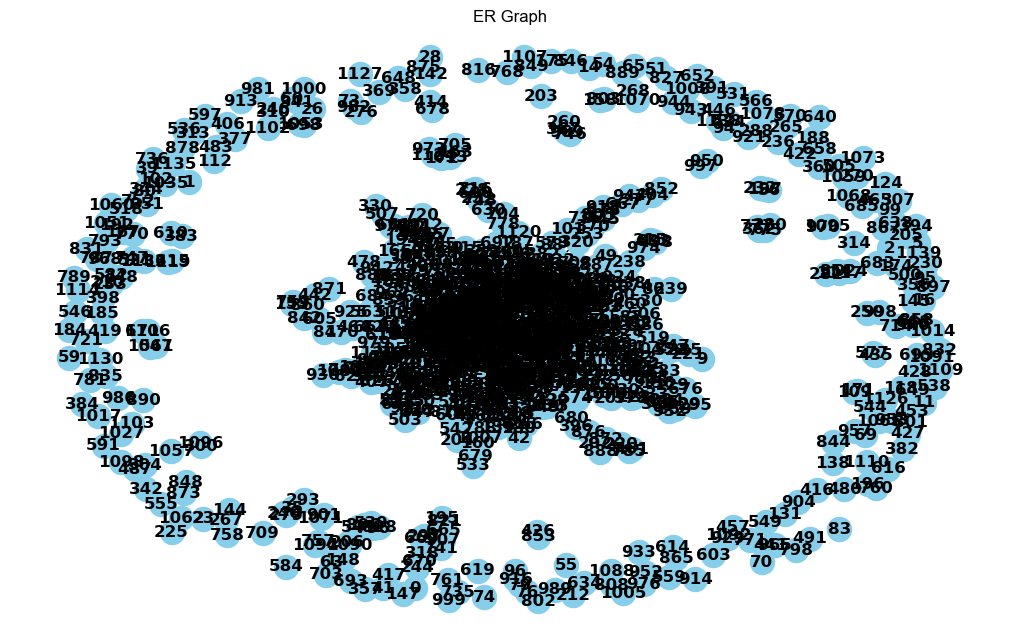

In [16]:
p = (2 * num_edges) / (num_nodes * (num_nodes - 1))

er_graph = nx.erdos_renyi_graph(num_nodes, p)
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(er_graph)  # Assuming spring layout for visualization
nx.draw(er_graph, pos, with_labels=True, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("ER Graph")

print("\nER Graph Information:")
print("Number of nodes:", len(er_graph.nodes))
print("Number of edges:", len(er_graph.edges))
plt.show()

BA Graph Information:
Number of nodes: 1140
Number of edges: 1139


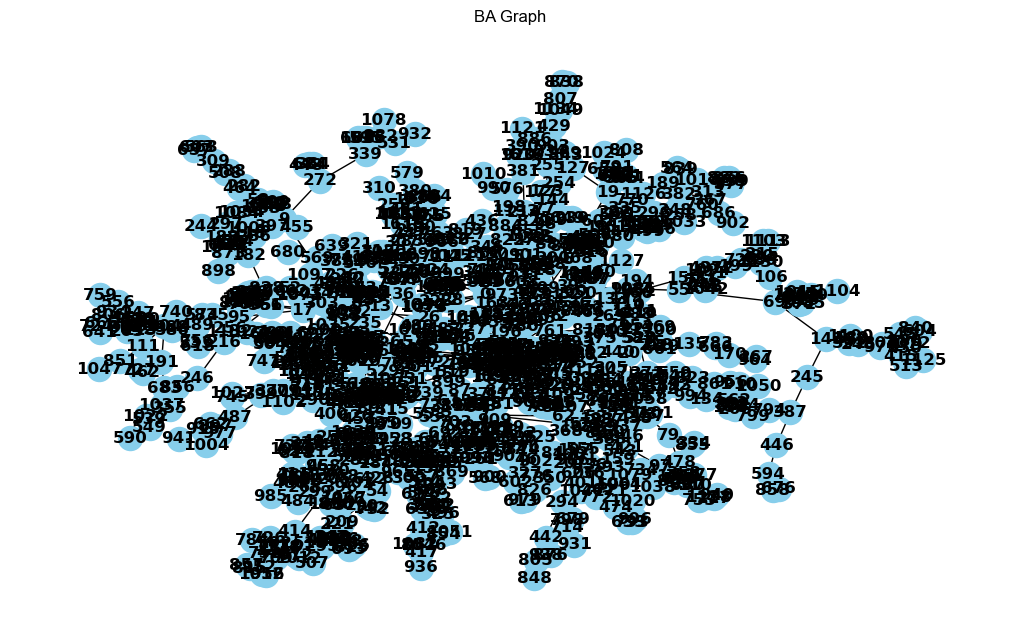

In [17]:
m = num_nodes // 1140

# Generate BA graph
ba_graph = nx.barabasi_albert_graph(num_nodes, m)

# BA Graph Information
ba_num_nodes = len(ba_graph.nodes)
ba_num_edges = len(ba_graph.edges)

print("BA Graph Information:")
print("Number of nodes:", ba_num_nodes)
print("Number of edges:", ba_num_edges)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(ba_graph)  # Assuming spring layout for visualization
nx.draw(ba_graph, pos, with_labels=True, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("BA Graph")
plt.show()

In [18]:
# Define the number of nodes and edges for the WS graph
num_nodes_ws = num_nodes
num_edges_ws = num_edges

# Define the initial rewiring probability for the WS graph
p_ws = 0.05  # Initial value

# Generate WS graphs with increasing rewiring probabilities until a connected graph is found
while True:
    # Generate the WS graph with the current rewiring probability
    ws_graph = nx.connected_watts_strogatz_graph(num_nodes_ws, 4, p_ws)
    
    # Check if the generated WS graph is connected
    if nx.is_connected(ws_graph):
        # Check if the generated WS graph has the same number of edges as the original graph
        if len(ws_graph.edges) == num_edges_ws:
            # If both conditions are met, break the loop
            break
    
    # Increase the rewiring probability for the next iteration
    p_ws += 0.01  # Adjust increment value as needed

# Print information about the WS graph
print("WS Graph Information:")
print("Number of nodes:", len(ws_graph.nodes))
print("Number of edges:", len(ws_graph.edges))

KeyboardInterrupt: 

Research question

How do user sentiments expressed in reviews correlate with the version of the application they making a review about?

In [20]:
df['Review_Created_At'] = pd.to_datetime(df['Review_Created_At'])

# Step 3: Sentiment Analysis
def get_sentiment(comment):
    analysis = TextBlob(comment)
    # Assign sentiment based on polarity score
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each comment
df['Sentiment'] = df['Comment'].apply(get_sentiment)

# Step 4: Correlation Analysis
sentiment_counts = df.groupby(['Version', 'Sentiment']).size().unstack(fill_value=0)

print(sentiment_counts)

Sentiment         Negative  Neutral  Positive
Version                                      
100.0.0                  0        0         5
5.1.0                    0        1         0
5.1.2                    1        0         0
6.10.0                   0        0         1
6.36.0                   1        0         0
...                    ...      ...       ...
9.64.0-release.0        20        7        30
9.65.0-release.0        11        7        34
9.65.1-release.0        77       96       217
9.66.0-alpha.2           0        1         0
9.8.0-release.01         0        1         0

[95 rows x 3 columns]


In [21]:
overall_sentiment_distribution = df['Sentiment'].value_counts()
print("Overall Sentiment Distribution:")
print(overall_sentiment_distribution)

Overall Sentiment Distribution:
Sentiment
Positive    670
Negative    301
Neutral     229
Name: count, dtype: int64


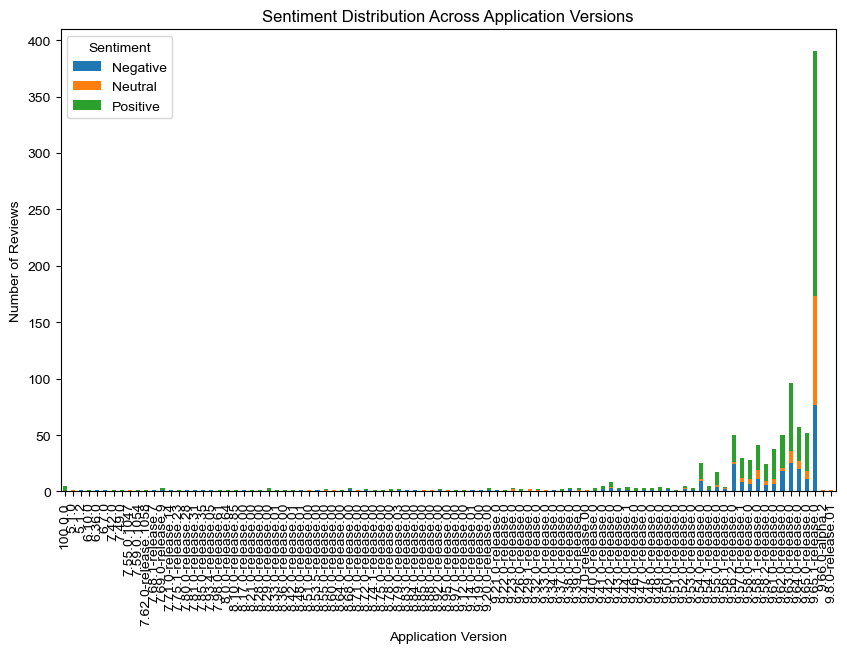

In [22]:
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Application Versions')
plt.xlabel('Application Version')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()